In [1]:
# """
# AI-Based Unsupervised River Pollution Data Generator
# ----------------------------------------------------
# This script generates 1000 rows of synthetic water quality data
# for an AI-based unsupervised river pollution detection project.
# Each record represents readings from multiple river stations
# with random pollution events introduced automatically.
# """

# import pandas as pd
# import numpy as np
# from datetime import datetime, timedelta
# import random

# # ========== CONFIGURATION ==========
# NUM_STATIONS = 5       # Number of monitoring stations
# TOTAL_ROWS = 1000      # Total number of readings
# OUTPUT_FILE = "AI_Unsupervised_River_Pollution_Data_1000.csv"

# # ========== SETUP ==========
# NUM_HOURS = TOTAL_ROWS // NUM_STATIONS
# STATIONS = [f"Station_{i}" for i in range(1, NUM_STATIONS + 1)]
# LATITUDES = np.linspace(29.0, 29.1, NUM_STATIONS)
# LONGITUDES = np.linspace(78.0, 78.1, NUM_STATIONS)
# START_TIME = datetime(2025, 1, 1, 0, 0, 0)

# # ========== DATA GENERATION ==========
# data = []

# for i in range(NUM_HOURS):
#     timestamp = START_TIME + timedelta(hours=i)
#     for j in range(NUM_STATIONS):
#         # Baseline (normal) water quality values
#         pH = np.random.normal(7.2, 0.2)
#         DO = np.random.normal(8, 0.5)            # Dissolved Oxygen
#         Temp = np.random.normal(25, 2)           # Water Temperature
#         Turbidity = np.random.normal(10, 2)      # Clarity
#         Conductivity = np.random.normal(300, 20) # Ion concentration
#         Nitrate = np.random.normal(2, 0.5)
#         Phosphate = np.random.normal(1, 0.3)
#         Ammonia = np.random.normal(0.5, 0.2)
#         FlowSpeed = np.random.normal(1.5, 0.1)

#         # Introduce synthetic pollution events randomly
#         if random.random() < 0.02 and j > 0:  # 2% chance of anomaly (not first station)
#             pH -= random.uniform(1.5, 3.0)
#             DO -= random.uniform(2.0, 4.0)
#             Turbidity += random.uniform(10, 20)
#             Conductivity += random.uniform(100, 200)
#             Nitrate += random.uniform(3, 6)
#             Phosphate += random.uniform(2, 4)
#             Ammonia += random.uniform(1, 3)

#         data.append([
#             timestamp, STATIONS[j], LATITUDES[j], LONGITUDES[j],
#             round(pH, 2), round(DO, 2), round(Temp, 2),
#             round(Turbidity, 2), round(Conductivity, 2),
#             round(Nitrate, 2), round(Phosphate, 2),
#             round(Ammonia, 2), round(FlowSpeed, 2)
#         ])

# # ========== DATAFRAME CREATION ==========
# columns = [
#     "Date_Time", "Station_ID", "Latitude", "Longitude",
#     "pH", "Dissolved_Oxygen", "Temperature", "Turbidity",
#     "Conductivity", "Nitrate", "Phosphate", "Ammonia", "Flow_Speed"
# ]

# df = pd.DataFrame(data, columns=columns)

# # ========== SAVE TO CSV ==========
# df.to_csv(OUTPUT_FILE, index=False)

# print(f"✅ Synthetic river pollution dataset generated successfully!")
# print(f"📁 File saved as: {OUTPUT_FILE}")
# print(f"📊 Total records: {len(df)} rows, {len(df.columns)} columns")
# print("\nPreview of dataset:")
# print(df.head(10))


✅ Synthetic river pollution dataset generated successfully!
📁 File saved as: AI_Unsupervised_River_Pollution_Data_1000.csv
📊 Total records: 1000 rows, 13 columns

Preview of dataset:
            Date_Time Station_ID  Latitude  Longitude    pH  Dissolved_Oxygen  \
0 2025-01-01 00:00:00  Station_1    29.000     78.000  7.30              7.67   
1 2025-01-01 00:00:00  Station_2    29.025     78.025  7.19              7.55   
2 2025-01-01 00:00:00  Station_3    29.050     78.050  7.00              6.56   
3 2025-01-01 00:00:00  Station_4    29.075     78.075  7.03              7.44   
4 2025-01-01 00:00:00  Station_5    29.100     78.100  7.42              7.25   
5 2025-01-01 01:00:00  Station_1    29.000     78.000  7.38              7.97   
6 2025-01-01 01:00:00  Station_2    29.025     78.025  6.94              8.05   
7 2025-01-01 01:00:00  Station_3    29.050     78.050  7.35              7.85   
8 2025-01-01 01:00:00  Station_4    29.075     78.075  7.25              7.83   
9 2025-

✅ Dataset loaded successfully!
             Date_Time Station_ID  Latitude  Longitude    pH  \
0  2025-01-01 00:00:00  Station_1    29.000     78.000  7.30   
1  2025-01-01 00:00:00  Station_2    29.025     78.025  7.19   
2  2025-01-01 00:00:00  Station_3    29.050     78.050  7.00   
3  2025-01-01 00:00:00  Station_4    29.075     78.075  7.03   
4  2025-01-01 00:00:00  Station_5    29.100     78.100  7.42   

   Dissolved_Oxygen  Temperature  Turbidity  Conductivity  Nitrate  Phosphate  \
0              7.67        23.89       8.92        322.33     2.16       0.56   
1              7.55        25.84       5.91        299.35     1.57       1.55   
2              6.56        26.75      12.32        285.52     1.77       1.32   
3              7.44        26.34       7.27        306.53     2.36       0.57   
4              7.25        21.79      10.28        282.11     2.54       1.32   

   Ammonia  Flow_Speed  
0     0.18        1.50  
1    -0.06        1.60  
2     0.25        1.39

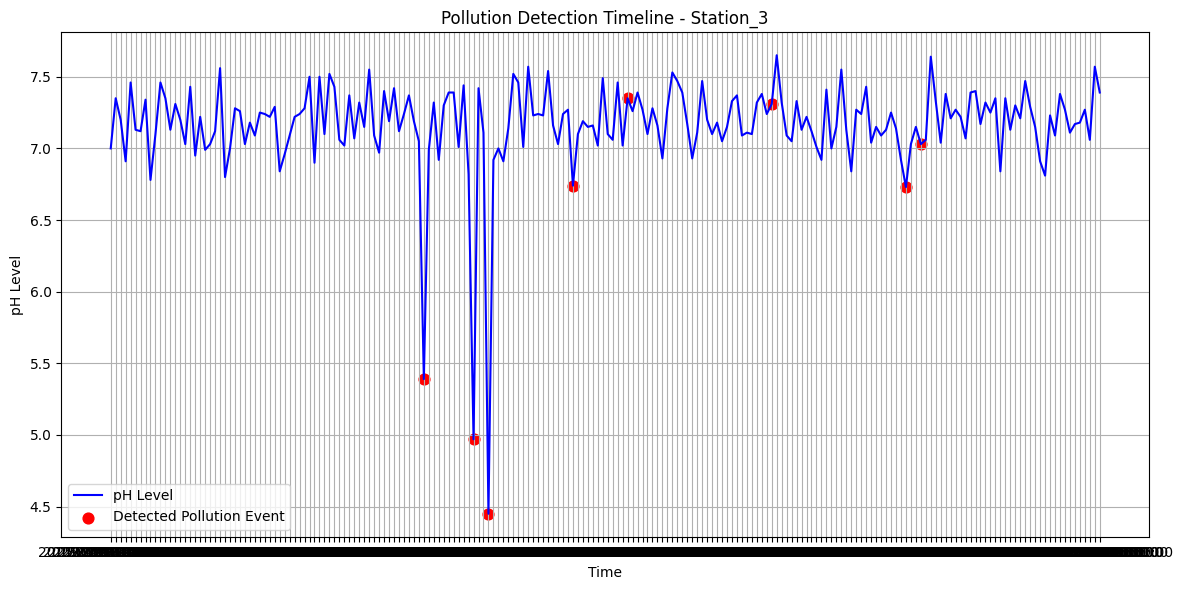

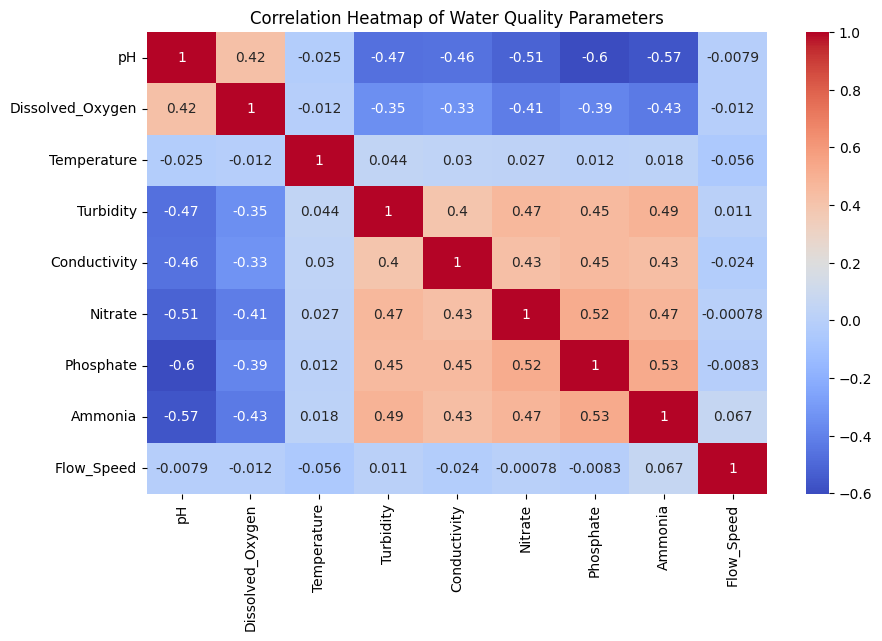

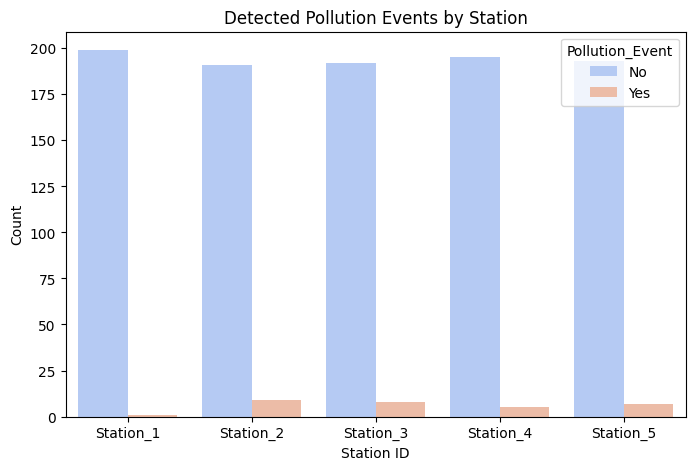


📁 Detected pollution events saved to: Detected_Pollution_Events.csv


In [2]:
# """
# AI-Based Unsupervised River Pollution Detection System
# ------------------------------------------------------
# Detects pollution events automatically using unsupervised learning
# (Isolation Forest) from multi-station water quality data.
# """

# # ======== IMPORTS ========
# import pandas as pd
# import numpy as np
# from sklearn.ensemble import IsolationForest
# import matplotlib.pyplot as plt
# import seaborn as sns
# from datetime import datetime

# # ======== LOAD DATA ========
# file_path = "AI_Unsupervised_River_Pollution_Data_1000.csv"
# df = pd.read_csv(file_path)

# print("✅ Dataset loaded successfully!")
# print(df.head())

# # ======== DATA PREPROCESSING ========
# # Drop non-numeric columns for ML
# features = df.drop(columns=["Date_Time", "Station_ID", "Latitude", "Longitude"])

# # Fill any missing values
# features = features.fillna(features.mean())

# # Normalize features
# features_scaled = (features - features.mean()) / features.std()

# # ======== UNSUPERVISED LEARNING MODEL ========
# model = IsolationForest(
#     n_estimators=200,
#     contamination=0.03,  # about 3% anomalies expected
#     random_state=42
# )

# model.fit(features_scaled)
# df["Anomaly_Score"] = model.decision_function(features_scaled)
# df["Anomaly_Flag"] = model.predict(features_scaled)

# # Convert flag: -1 = anomaly, 1 = normal
# df["Pollution_Event"] = df["Anomaly_Flag"].apply(lambda x: "Yes" if x == -1 else "No")

# # ======== RESULTS SUMMARY ========
# num_anomalies = df[df["Pollution_Event"] == "Yes"].shape[0]
# print(f"\n⚠️ Detected {num_anomalies} possible pollution events out of {len(df)} readings.")

# # ======== VISUALIZATION 1: Timeline for one station ========
# station_name = "Station_3"
# station_df = df[df["Station_ID"] == station_name]

# plt.figure(figsize=(12, 6))
# plt.plot(station_df["Date_Time"], station_df["pH"], label="pH Level", color="blue")
# plt.scatter(
#     station_df["Date_Time"][station_df["Pollution_Event"] == "Yes"],
#     station_df["pH"][station_df["Pollution_Event"] == "Yes"],
#     color="red", label="Detected Pollution Event", s=60
# )
# plt.title(f"Pollution Detection Timeline - {station_name}")
# plt.xlabel("Time")
# plt.ylabel("pH Level")
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()

# # ======== VISUALIZATION 2: Heatmap of features ========
# plt.figure(figsize=(10, 6))
# sns.heatmap(features.corr(), annot=True, cmap="coolwarm")
# plt.title("Correlation Heatmap of Water Quality Parameters")
# plt.show()

# # ======== VISUALIZATION 3: Pollution Frequency by Station ========
# plt.figure(figsize=(8, 5))
# sns.countplot(data=df, x="Station_ID", hue="Pollution_Event", palette="coolwarm")
# plt.title("Detected Pollution Events by Station")
# plt.xlabel("Station ID")
# plt.ylabel("Count")
# plt.show()

# # ======== SAVE DETECTED ANOMALIES ========
# pollution_df = df[df["Pollution_Event"] == "Yes"]
# pollution_df.to_csv("Detected_Pollution_Events.csv", index=False)
# print("\n📁 Detected pollution events saved to: Detected_Pollution_Events.csv")


🚀 Starting AI-Based Unsupervised River Pollution Detection...

🌊 Pollution cluster event simulated near hour 51
🌊 Pollution cluster event simulated near hour 57
🌊 Pollution cluster event simulated near hour 175
🌊 Pollution cluster event simulated near hour 97
🌊 Pollution cluster event simulated near hour 6

✅ Synthetic dataset generated successfully: AI_Unsupervised_River_Pollution_Data_1000.csv

⚠️ Detected 30 possible pollution events out of 1000 readings.

📁 Detected pollution clusters saved to: Detected_Pollution_Clusters.csv

🧩 Cluster Summary:
Cluster_Label
-1    12
 2     4
 0     3
 1     3
 3     3
 5     3
 4     2
Name: count, dtype: int64


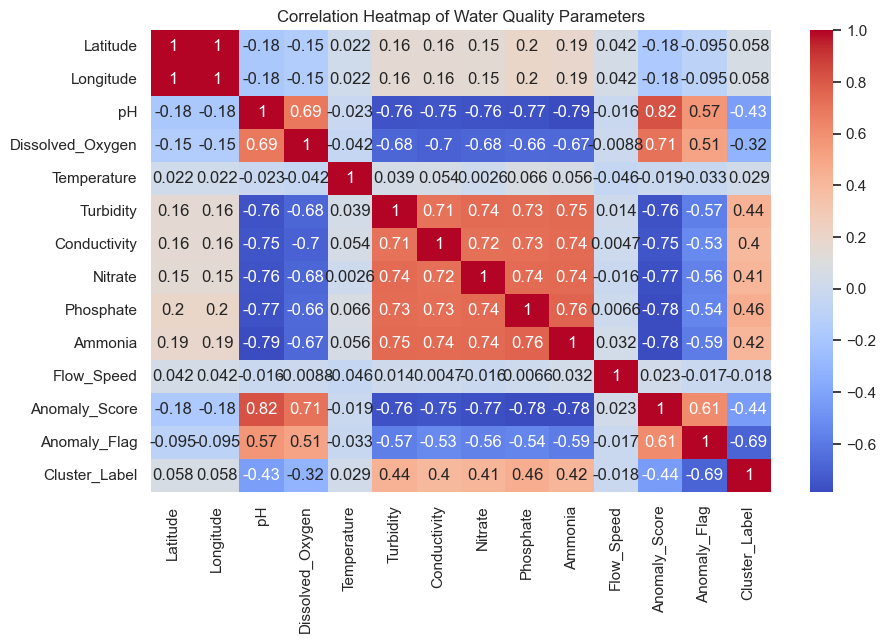

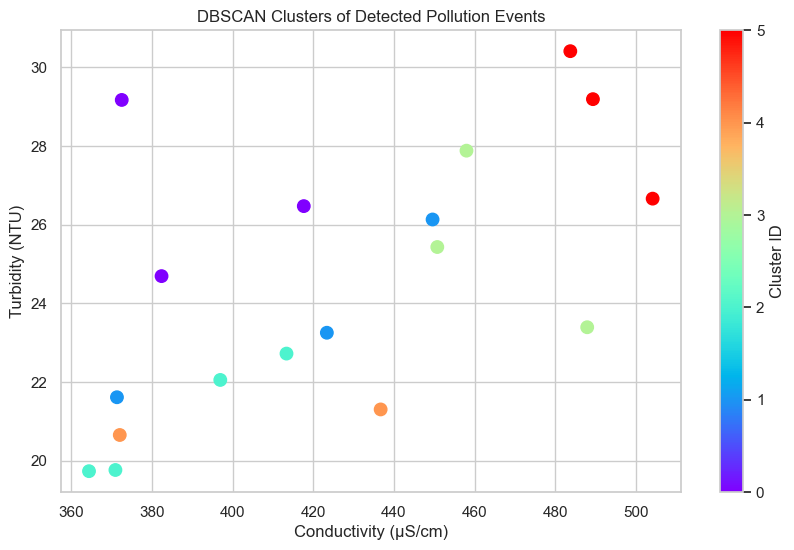

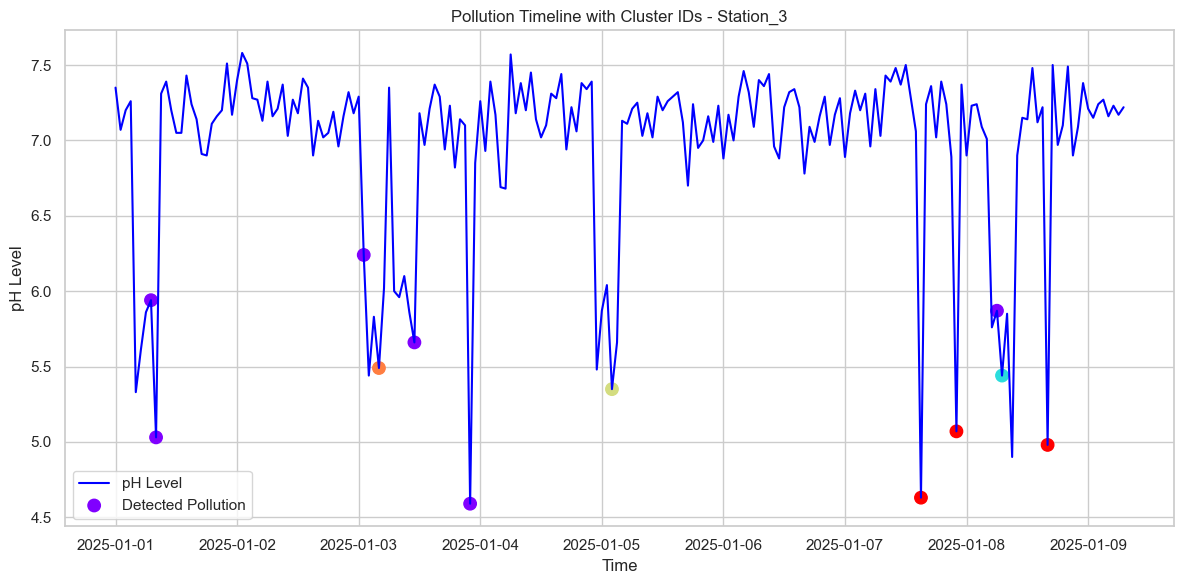


✅ Process completed successfully!


In [5]:
"""
AI-Based Unsupervised River Pollution Detection & Clustering System
-------------------------------------------------------------------
This system automatically detects and groups river pollution events
using upstream–downstream sensor data and unsupervised ML algorithms:
Isolation Forest for anomaly detection and DBSCAN for clustering.
"""

# ======== IMPORTS ========
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import random
from datetime import datetime, timedelta

# ===============================================================
# STEP 1: SYNTHETIC DATA GENERATION (Improved for Cluster Formation)
# ===============================================================

def generate_synthetic_data(num_stations=5, total_rows=1000):
    """Generate synthetic river water quality data with pollution clusters."""
    num_hours = total_rows // num_stations
    stations = [f"Station_{i}" for i in range(1, num_stations + 1)]
    latitudes = np.linspace(29.0, 29.1, num_stations)
    longitudes = np.linspace(78.0, 78.1, num_stations)
    start_time = datetime(2025, 1, 1, 0, 0, 0)

    data = []

    # Define specific "pollution cluster periods"
    cluster_periods = random.sample(range(num_hours), 5)  # 5 clusters randomly spread
    for cluster_time in cluster_periods:
        print(f"🌊 Pollution cluster event simulated near hour {cluster_time}")

    for i in range(num_hours):
        timestamp = start_time + timedelta(hours=i)
        for j in range(num_stations):
            # Baseline (normal) water quality values
            pH = np.random.normal(7.2, 0.2)
            DO = np.random.normal(8, 0.5)
            Temp = np.random.normal(25, 2)
            Turbidity = np.random.normal(10, 2)
            Conductivity = np.random.normal(300, 20)
            Nitrate = np.random.normal(2, 0.5)
            Phosphate = np.random.normal(1, 0.3)
            Ammonia = np.random.normal(0.5, 0.2)
            FlowSpeed = np.random.normal(1.5, 0.1)

            # Introduce pollution events (normal + clustered)
            # Random pollution (rare)
            if random.random() < 0.015 and j > 0:
                pH -= random.uniform(1.5, 3.0)
                DO -= random.uniform(2.0, 4.0)
                Turbidity += random.uniform(10, 20)
                Conductivity += random.uniform(100, 200)
                Nitrate += random.uniform(3, 6)
                Phosphate += random.uniform(2, 4)
                Ammonia += random.uniform(1, 3)

            # Clustered pollution events (happen near cluster_periods)
            if any(abs(i - t) <= 2 for t in cluster_periods) and j in [2, 3, 4]:
                pH -= random.uniform(1.0, 2.0)
                DO -= random.uniform(1.5, 3.0)
                Turbidity += random.uniform(8, 15)
                Conductivity += random.uniform(80, 150)
                Nitrate += random.uniform(2, 4)
                Phosphate += random.uniform(1, 3)
                Ammonia += random.uniform(0.8, 2.0)

            data.append([
                timestamp, stations[j], latitudes[j], longitudes[j],
                round(pH, 2), round(DO, 2), round(Temp, 2),
                round(Turbidity, 2), round(Conductivity, 2),
                round(Nitrate, 2), round(Phosphate, 2),
                round(Ammonia, 2), round(FlowSpeed, 2)
            ])

    columns = [
        "Date_Time", "Station_ID", "Latitude", "Longitude",
        "pH", "Dissolved_Oxygen", "Temperature", "Turbidity",
        "Conductivity", "Nitrate", "Phosphate", "Ammonia", "Flow_Speed"
    ]

    df = pd.DataFrame(data, columns=columns)
    df.to_csv("AI_Unsupervised_River_Pollution_Data_1000.csv", index=False)
    print("\n✅ Synthetic dataset generated successfully: AI_Unsupervised_River_Pollution_Data_1000.csv")
    return df


# ===============================================================
# STEP 2: UNSUPERVISED ANOMALY DETECTION (Isolation Forest)
# ===============================================================

def detect_pollution(df):
    """Detect pollution events using Isolation Forest."""
    features = df.drop(columns=["Date_Time", "Station_ID", "Latitude", "Longitude"])
    features = features.fillna(features.mean())

    # Normalize
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    model = IsolationForest(n_estimators=200, contamination=0.03, random_state=42)
    model.fit(features_scaled)

    df["Anomaly_Score"] = model.decision_function(features_scaled)
    df["Anomaly_Flag"] = model.predict(features_scaled)
    df["Pollution_Event"] = df["Anomaly_Flag"].apply(lambda x: "Yes" if x == -1 else "No")

    num_anomalies = df[df["Pollution_Event"] == "Yes"].shape[0]
    print(f"\n⚠️ Detected {num_anomalies} possible pollution events out of {len(df)} readings.")
    return df, features_scaled


# ===============================================================
# STEP 3: CLUSTER POLLUTION EVENTS (DBSCAN)
# ===============================================================

def cluster_pollution(df, features_scaled):
    """Group pollution events using DBSCAN clustering."""
    anomalies = df[df["Pollution_Event"] == "Yes"].copy()
    anomaly_features = features_scaled[df["Pollution_Event"] == "Yes"]

    dbscan_model = DBSCAN(eps=2.5, min_samples=2)
    clusters = dbscan_model.fit_predict(anomaly_features)
    anomalies["Cluster_Label"] = clusters

    # Merge cluster info
    df = df.merge(
        anomalies[["Date_Time", "Station_ID", "Cluster_Label"]],
        on=["Date_Time", "Station_ID"], how="left"
    )
    df["Cluster_Label"] = df["Cluster_Label"].fillna(-1)

    # Save anomalies
    anomalies.to_csv("Detected_Pollution_Clusters.csv", index=False)
    print("\n📁 Detected pollution clusters saved to: Detected_Pollution_Clusters.csv")

    print("\n🧩 Cluster Summary:")
    print(anomalies["Cluster_Label"].value_counts())
    return df, anomalies


# ===============================================================
# STEP 4: VISUALIZATION
# ===============================================================

def visualize_results(df, anomalies):
    """Generate visualizations for pollution detection and clusters."""
    sns.set(style="whitegrid")

    # --- Heatmap ---
    plt.figure(figsize=(10, 6))
    # sns.heatmap(df.drop(columns=["Date_Time", "Station_ID"]).corr(), annot=True, cmap="coolwarm")
    # --- Heatmap (only numeric columns) ---
    numeric_df = df.select_dtypes(include=[np.number])  # select only numeric columns
    sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
    
    
    plt.title("Correlation Heatmap of Water Quality Parameters")
    plt.show()

    # --- Clusters (if found) ---
    cluster_data = anomalies[anomalies["Cluster_Label"] != -1]
    if not cluster_data.empty:
        plt.figure(figsize=(10, 6))
        plt.scatter(
            cluster_data["Conductivity"], cluster_data["Turbidity"],
            c=cluster_data["Cluster_Label"], cmap="rainbow", s=80
        )
        plt.title("DBSCAN Clusters of Detected Pollution Events")
        plt.xlabel("Conductivity (µS/cm)")
        plt.ylabel("Turbidity (NTU)")
        plt.colorbar(label="Cluster ID")
        plt.show()
    else:
        print("⚠️ No significant clusters found — only isolated pollution events.")

    # --- Timeline plot for one station ---
    station_name = "Station_3"
    station_df = df[df["Station_ID"] == station_name]

    plt.figure(figsize=(12, 6))
    plt.plot(station_df["Date_Time"], station_df["pH"], label="pH Level", color="blue")
    plt.scatter(
        station_df["Date_Time"][station_df["Pollution_Event"] == "Yes"],
        station_df["pH"][station_df["Pollution_Event"] == "Yes"],
        c=station_df["Cluster_Label"][station_df["Pollution_Event"] == "Yes"],
        cmap="rainbow", s=80, label="Detected Pollution"
    )
    plt.title(f"Pollution Timeline with Cluster IDs - {station_name}")
    plt.xlabel("Time")
    plt.ylabel("pH Level")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# ===============================================================
# STEP 5: MAIN EXECUTION
# ===============================================================

if __name__ == "__main__":
    print("🚀 Starting AI-Based Unsupervised River Pollution Detection...\n")

    df = generate_synthetic_data()
    df, features_scaled = detect_pollution(df)
    df, anomalies = cluster_pollution(df, features_scaled)
    visualize_results(df, anomalies)

    print("\n✅ Process completed successfully!")
